# Advanced Visualizations and Seaborn

- Scatter plot given petal length and width using matpplot
  - Plot for each species. using groupby and for loop
  - Plot using SNs scatterplot
- Plot correlations dataframe
  - Scatter plot
  - plot using subplots at least 2 of them
  - use sns pairplot


Cheatsheet
```python


# The result is a very similar graph in one line of code. Note that the legend
# and axis labels are automatically applied.
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')
sns.pairplot
```

```python
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
fig, ax = plt.subplots(4, 4, figsize=(10,10))

for i, x in enumerate(columns):
  for j, y in enumerate(columns):
    if i == j:
      continue
    for species, species_df in df.groupby("Species"):
      ax[i][j].scatter(species_df[x], species_df[y], label=species)
    ax[i][j].set_xlabel(x)
    ax[i][j].set_ylabel(y)
```




Starter Code:

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np


# This is a dataset of cities in California. It contains a combination of
# location information (latitude/longitude) and various geographic information.
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/iris_train.csv", index_col=0)
df

,Sepal.Width,Petal.Length,Petal.Width,Species
Sepal.Length,,,,
4.7,3.2,1.3,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
4.9,3.1,1.5,0.1,setosa
...,...,...,...,...
6.7,3.3,5.7,2.5,virginica
6.7,3.0,5.2,2.3,virginica
6.5,3.0,5.2,2.0,virginica


# Advanced visualization example

Sometimes, when visualizing complex data, you can take advantage of Matplotlib's flexibility to add an enormous amount of extra information to otherwise simple visualizations.

Every visualization is unique and depends on your data, so there will be different considerations to make in different circumstances. However, this notebook goes through the process of creating an information-dense visualization one step at a time as a demonstration of the process you might go through when creating your own visualizations.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:

# This is a dataset of cities in California. It contains a combination of
# location information (latitude/longitude) and various geographic information.
df = pd.read_csv("https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv", index_col=0)
df

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


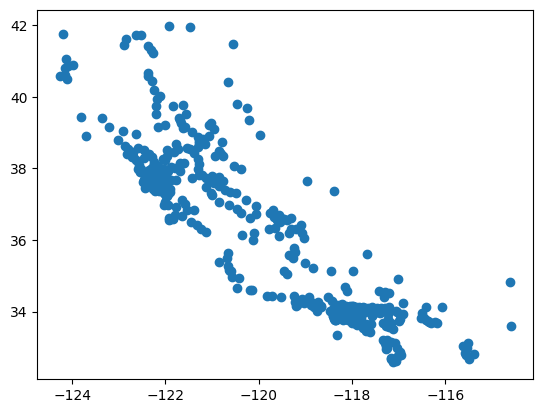

In [ ]:
# Because we have location data for each city, an obvious way to visualize this
# data is to do it spatially. If we plot longitude (X) against latitude (Y), we
# should get a sense of where each city is and even see a shape that resembles
# California. Let's see what this looks like:

plt.scatter(
    df['longd'],
    df['latd'],
)

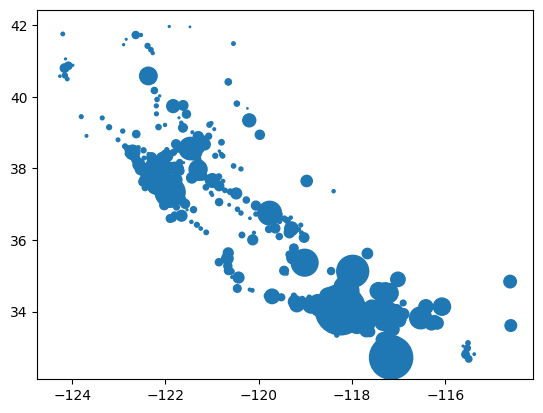

In [ ]:
# This is a good first step, and definitely gives us a sense of where every city
# is. But this visualization doesn't tell us much other than where the cities
# are. Let's check the documentation for scatter plots:
#
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
#
# Matplotlib gives us control over many aspects of the scatter plot, including
# the size and color of each point. We can use these attributes to communicate
# additional information.
#
# What else can we show? Let's visualize the area of each city. Because area is
# a measure of size, it's natural to consider visualizing area as the size of
# each point (but this isn't required - we could do it by color too).
#
# Now we're getting somewhere - physically large cities are represented by
# large points, and physically small cities are represented by small points.
plt.scatter(
    df['longd'],
    df['latd'],
    s=df['area_total_km2'],
)

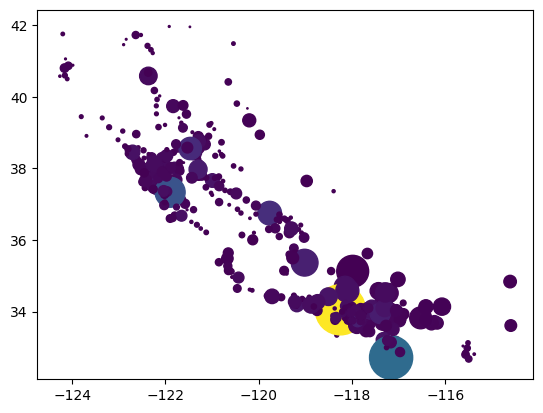

In [ ]:
# What else can we convey? We can use the color of each point to show the population
# of each city:
plt.scatter(
    df['longd'],
    df['latd'],
    s=df['area_total_km2'],
    c=df['population_total'],
)

(array([474.,   4.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.0000000e+00, 3.8843160e+05, 7.7686220e+05, 1.1652928e+06,
        1.5537234e+06, 1.9421540e+06, 2.3305846e+06, 2.7190152e+06,
        3.1074458e+06, 3.4958764e+06, 3.8843070e+06]),
 <BarContainer object of 10 artists>)

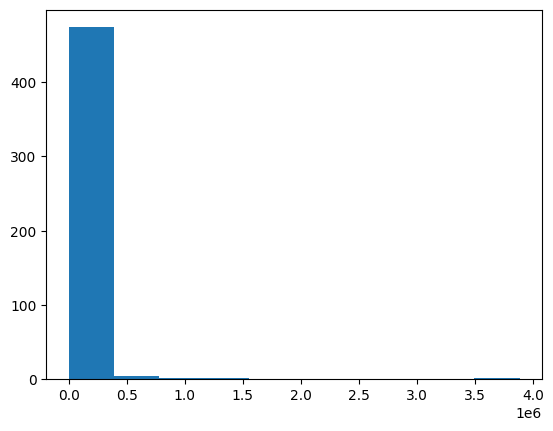

In [ ]:
# The graph above is OK, but most of the points have the same color. Why?
# If we take a brief digression and look at a histogram of population_total,
# we see the vast majority of cities have a very small population, and very
# few have a large population. This makes sense, and we can see it in the visualization
# above. This is good to know, but makes our visualization not quite as useful
# since there is very little nuance in the data.
plt.hist(df['population_total'])

(array([  1.,   0.,   0.,   6.,  22.,  75., 184., 170.,  21.,   3.]),
 array([0.        , 0.65893135, 1.31786271, 1.97679406, 2.63572542,
        3.29465677, 3.95358813, 4.61251948, 5.27145084, 5.93038219,
        6.58931355]),
 <BarContainer object of 10 artists>)

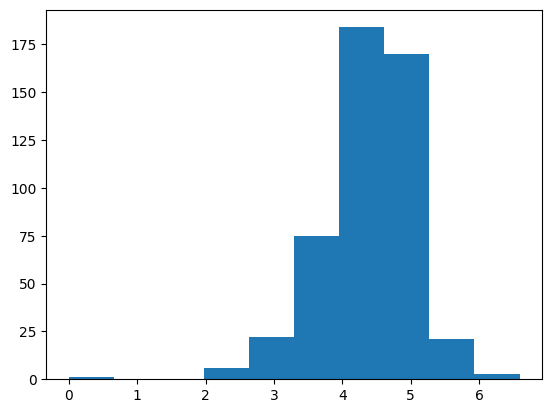

In [ ]:
# Here's an idea - what if we take the log of the population total?
# A log scale is useful in this situation because it tones down large
# values much more than small values, and will allow the smaller values
# to occupy more of the range of data. We can see taking the log
# makes our data appear closer to a normal distribution:
plt.hist(np.log10(df['population_total']))

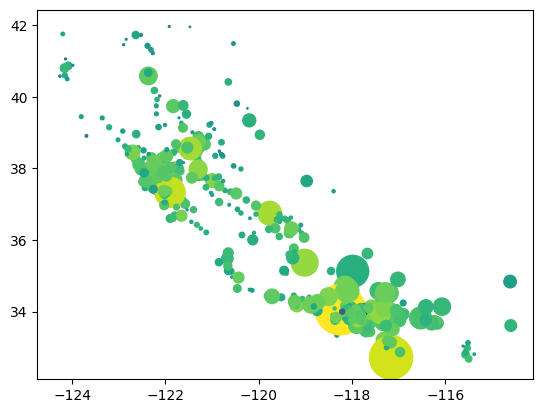

In [ ]:
# We can see the effect on the visualization: We see much more nuance
# among the city populations.
plt.scatter(
    df['longd'],
    df['latd'],
    s=df['area_total_km2'],
    c=np.log(df['population_total']),
)

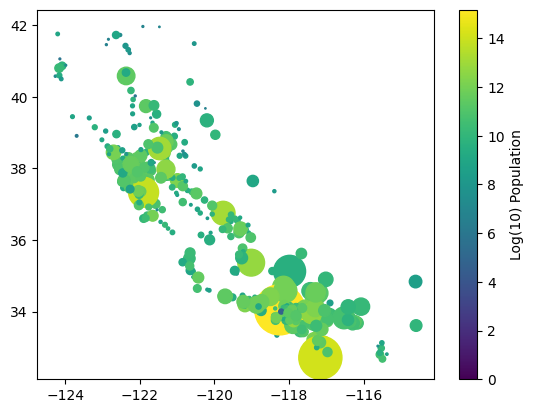

In [ ]:
# Now there's another problem: We don't know what the colors mean
# in terms of city population. We can add a color bar that explains
# what it means, along with a title making it clear that we're looking
# at log-population instead of population.
#
# We now understand that lighter, yellow points are densely populated
# cities, and darker points are more sparsely populated cities.
plt.scatter(
    df['longd'],
    df['latd'],
    s=df['area_total_km2'],
    c=np.log(df['population_total']),
)
plt.colorbar(label="Log(10) Population")

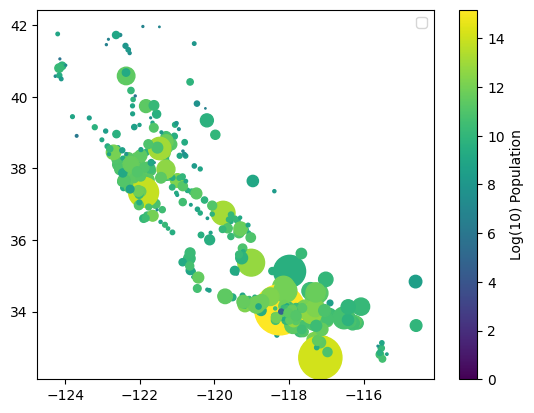

In [ ]:
# Now that we understand point color, now we need to explain point size.
# We understand large points mean larger cities, but how large do we mean?
# The chart needs a legend to help us understand what the different sizes mean.
#
# Unfortunately, just adding a legend doesn't do anything for us. We didn't label
# the scatter plot, and even if we did, we didn't break the scatter plot into
# different components - this chart would only ever produce one label. So how do
# we show the relative size of cities?
plt.scatter(
    df['longd'],
    df['latd'],
    s=df['area_total_km2'],
    c=np.log(df['population_total']),
)
plt.colorbar(label="Log(10) Population")
plt.legend()

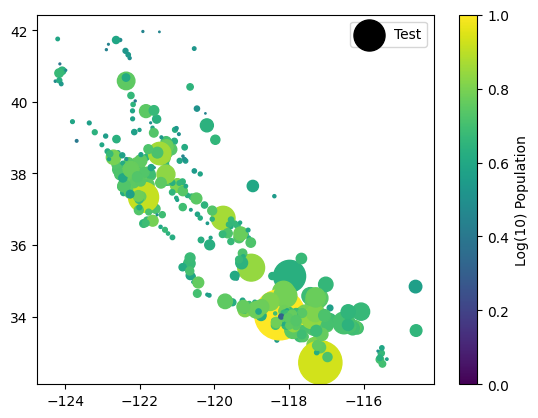

In [ ]:
# This is kind of a hack, but it works. We can make an empty scatter plot without
# any points, but give it a size and label it, and it will show up in our legend
# but not in the chart. As a bonus, when it appears in the legend, it will be
# the size and color we specify.
plt.scatter(
    df['longd'],
    df['latd'],
    s=df['area_total_km2'],
    c=np.log(df['population_total']),
)
plt.scatter([], [], s=500, c='black', label="Test")
plt.colorbar(label="Log(10) Population")
plt.legend()

In [ ]:
# So now we can illustrate different city sizes. What sizes should we use? Let's
# check .describe() and pick some numbers. For this visualization, we'll use 100,
# 250, and 500 km2, but you can experiment and try different values.
df['area_total_km2'].describe()

count     477.000000
mean       46.753283
std        90.972269
min         0.813000
25%         9.551000
50%        23.551000
75%        51.772000
max      1302.000000
Name: area_total_km2, dtype: float64

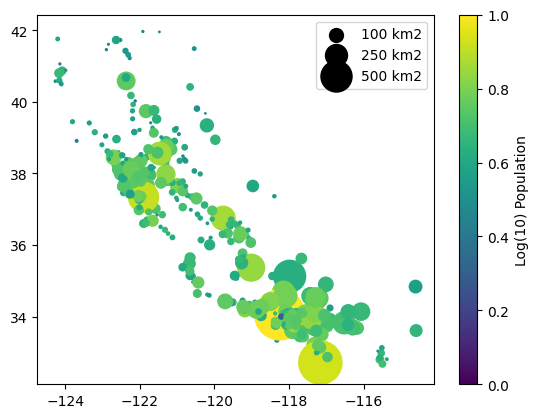

In [ ]:
# This is a good start, but the legend could use some cleanup.
plt.scatter(
    df['longd'],
    df['latd'],
    s=df['area_total_km2'],
    c=np.log(df['population_total']),
)

plt.scatter([], [], s=100, c='black', label="100 km2")
plt.scatbter([], [], s=250, c='black', label="250 km2")
plt.scatter([], [], s=500, c='black', label="500 km2")

plt.colorbar(label="Log(10) Population")
plt.legend()

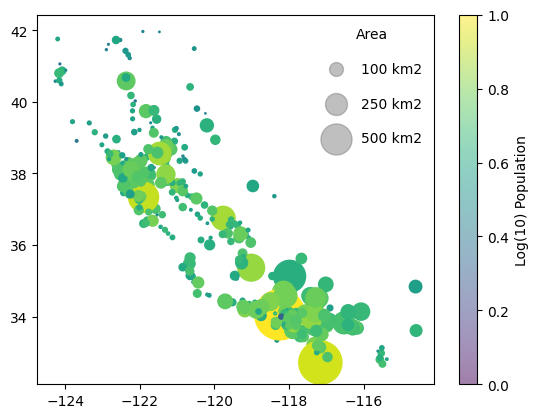

In [ ]:
# Here, we made the points in the legend a less attention-grabbing gray color,
# spaced them apart with the labelspacing argument, gave the legend a title,
# and set frameon to False meaning the legend is drawn without an outline.
#
# This looks really good! We still can't look at a point and determine the exact
# area, but now we have a good idea of the approximate area. To see why this is
# useful, can you find a city with an area of less than 100? Greater than 500?
# It was impossible before, but now you can do it.
plt.scatter(
    df['longd'],
    df['latd'],
    s=df['area_total_km2'],
    c=np.log(df['population_total']),
)

plt.scatter([], [], s=100, c='gray', alpha=0.5, label="100 km2")
plt.scatter([], [], s=250, c='gray', alpha=0.5, label="250 km2")
plt.scatter([], [], s=500, c='gray', alpha=0.5, label="500 km2")

plt.legend(labelspacing=1.5, frameon=False, title="Area")
plt.colorbar(label="Log(10) Population")

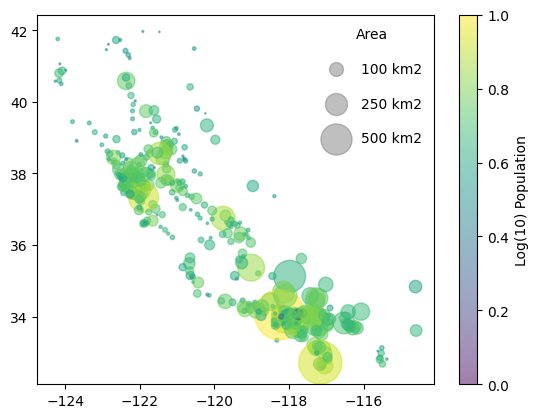

In [ ]:
# Our graph is now almost complete, but we have a few details to
# attend to. One issue is that the points themselves are fully
# oaque, and some block out others in a way that makes it difficult
# to see them. This is especially true in dense regions where many
# cities are clustered together.
#
# We can fix this by making the points semi-transparent with the
# alpha argument. Doing this makes it a little easier to see all
# the cities.
plt.scatter(
    df['longd'],
    df['latd'],
    s=df['area_total_km2'],
    c=np.log(df['population_total']),
    alpha=0.5
)

plt.scatter([], [], s=100, c='gray', alpha=0.5, label="100 km2")
plt.scatter([], [], s=250, c='gray', alpha=0.5, label="250 km2")
plt.scatter([], [], s=500, c='gray', alpha=0.5, label="500 km2")

plt.legend(labelspacing=1.5, frameon=False, title="Area")
plt.colorbar(label="Log(10) Population")

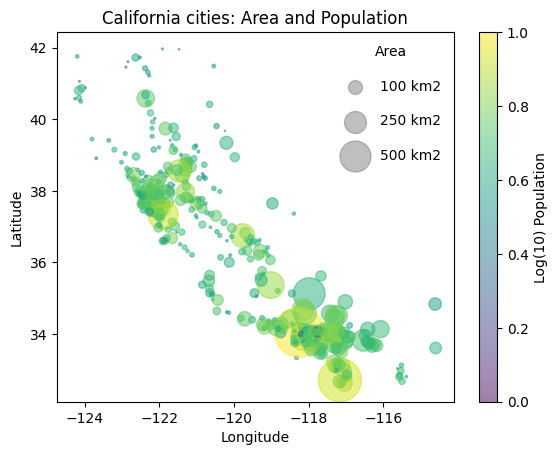

In [ ]:
# Next, and most important, the graph is still not completely
# legible to a newcomer who has never seen this data before.
# We should give the graph a title and label the x/y axes
# so that there is no doubt as to what it depicts.
#
# This is now a complete chart, and something you can put
# in a report.
plt.scatter(
    df['longd'],
    df['latd'],
    s=df['area_total_km2'],
    c=np.log(df['population_total']),
    alpha=0.5
)

plt.scatter([], [], s=100, c='gray', alpha=0.5, label="100 km2")
plt.scatter([], [], s=250, c='gray', alpha=0.5, label="250 km2")
plt.scatter([], [], s=500, c='gray', alpha=0.5, label="500 km2")

plt.title("California cities: Area and Population")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend(labelspacing=1.5, frameon=False, title="Area")
plt.colorbar(label="Log(10) Population")